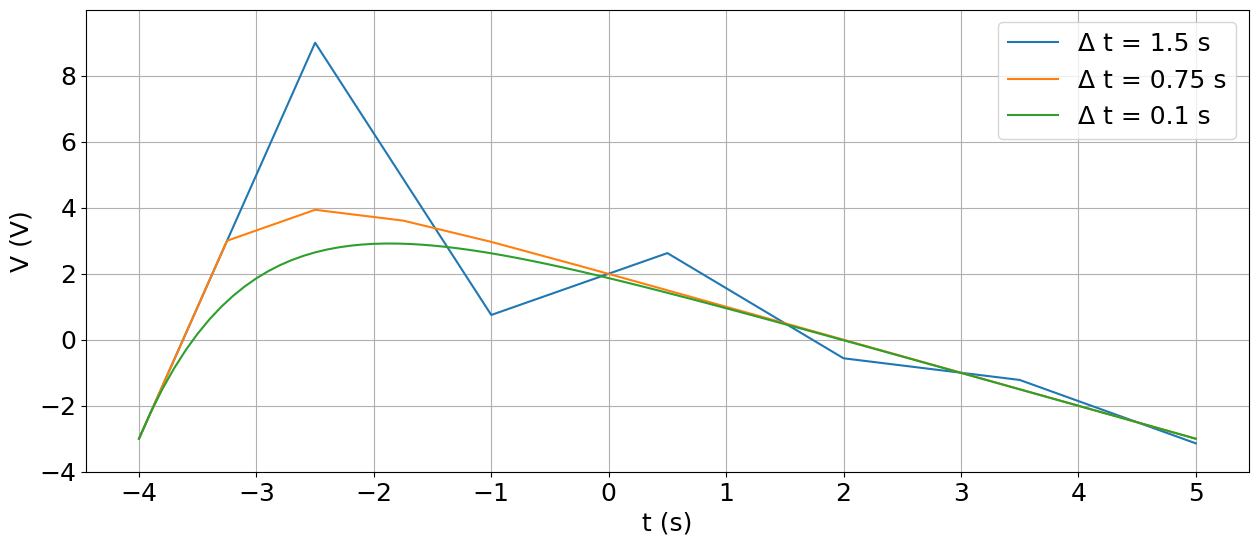

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18}) #设置全局

def slope(V, t):
    return 1 - V - t
    
def forward_euler(slope, V0, t0, t1, delta_t): #function, 初始y值, 初始x值和结束x值，delta t
    num_t = int((t1-t0)/delta_t) + 1 #时间点个数
    t = np.linspace(t0, t1, num_t) #生成时间点  初，终，个数
    V = np.zeros(num_t)  #每个时间点对应的V最开始都设为0
    V[0] = V0  #V[0]初始值
    for i in range(1, num_t): 
        V[i] = V[i-1] + delta_t * slope(V[i-1], t[i-1])
    return t, V

def heun(slope, V0, t0, t1, delta_t): #function, 初始y值, 初始x值和结束x值，delta t
    num_t = int((t1-t0)/delta_t) + 1 #时间点个数
    t = np.linspace(t0, t1, num_t) #生成时间点  初，终，个数
    V = np.zeros(num_t)  #每个时间点对应的V最开始都设为0
    V[0] = V0  #V[0]初始值
    for i in range(1, num_t): 
        A = slope(V[i-1], t[i-1])
        V_tilde = V[i-1] + A * delta_t 
        B = slope(V_tilde, t[i])
        V[i] = V[i-1] + delta_t * (A+B) / 2
    return t, V

def exponential_euler_1order(slope, V0, t0, t1, delta_t):
    num_t = int((t1-t0)/delta_t) + 1
    t = np.linspace(t0, t1, num_t)
    V = np.zeros(num_t)
    V[0] = V0
    A = -1
    B = np.linspace(-t0+1, -t1+1, num_t) #1-t
    for i in range(1, num_t): 
        V[i] = V[i-1] * np.exp(A * delta_t) + (B[i-1] / A) * (np.exp(A * delta_t) - 1)
    return t, V

# Set initial conditions
V0 = -3
t0 = -4
t1 = 5

plt.figure(figsize=(15, 6))
# Run simulations for different step sizes
delta_t_values = [1.5, 0.75, 0.1]
for delta_t_value in delta_t_values:
    time_points, V = forward_euler(slope, V0, t0, t1, delta_t_value)
    plt.plot(time_points, V, label=f'Δ t = {delta_t_value} s')

plt.xlabel('t (s)')
plt.ylabel('V (V)')
plt.grid(True) 
plt.legend()
plt.xticks(np.arange(min(time_points), max(time_points)+1, 1)) # plt 刻度设为一
plt.yticks(np.arange(-4, 9, 2))
plt.ylim(-4,10)
# plt.rcParams.update({'font.size': 18}) 
plt.show()

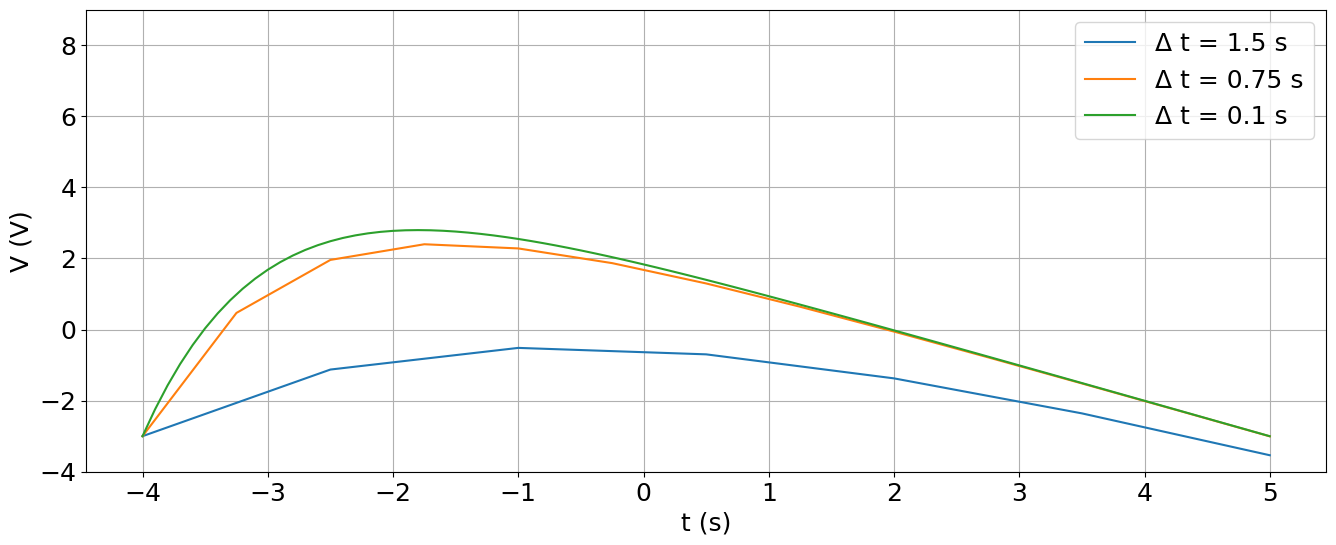

In [8]:
plt.figure(figsize=(16, 6))
# Run simulations for different step sizes
delta_t_values = [1.5, 0.75, 0.1]
for delta_t_value in delta_t_values:
    time_points, V = heun(slope, V0, t0, t1, delta_t_value)
    plt.plot(time_points, V, label=f'Δ t = {delta_t_value} s')

plt.xlabel('t (s)')
plt.ylabel('V (V)')
plt.grid(True) 
plt.legend()
plt.xticks(np.arange(min(time_points), max(time_points)+1, 1)) # plt 刻度设为一
plt.yticks(np.arange(-4, 9, 2))
plt.ylim(-4,9)
plt.rcParams.update({'font.size': 18}) 

plt.show()

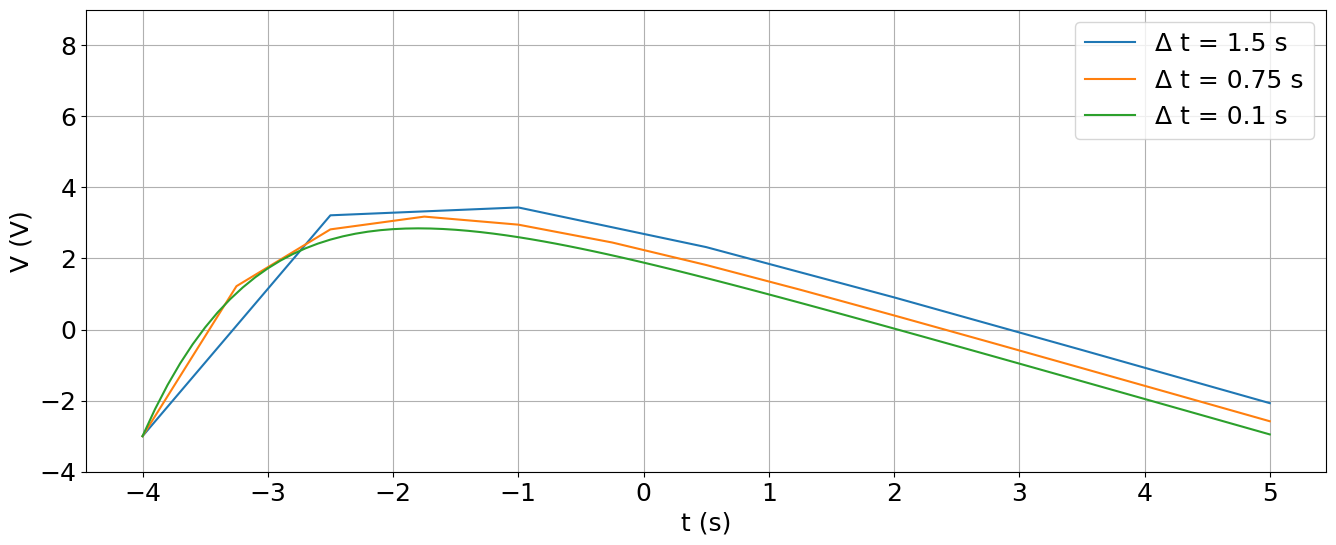

In [11]:
plt.figure(figsize=(16, 6))
for delta_t_value in delta_t_values:
    time_points, V = exponential_euler_1order(slope, V0, t0, t1, delta_t_value)
    plt.plot(time_points, V, label=f'Δ t = {delta_t_value} s')

plt.xlabel('t (s)')
plt.ylabel('V (V)')
plt.grid(True) #有网格
plt.legend()
plt.xticks(np.arange(min(time_points), max(time_points)+1, 1)) # plt 刻度设为一
plt.yticks(np.arange(-4, 9, 2)) # plt 刻度设为一
plt.ylim(-4,9)
plt.rcParams.update({'font.size': 18}) 
plt.show()

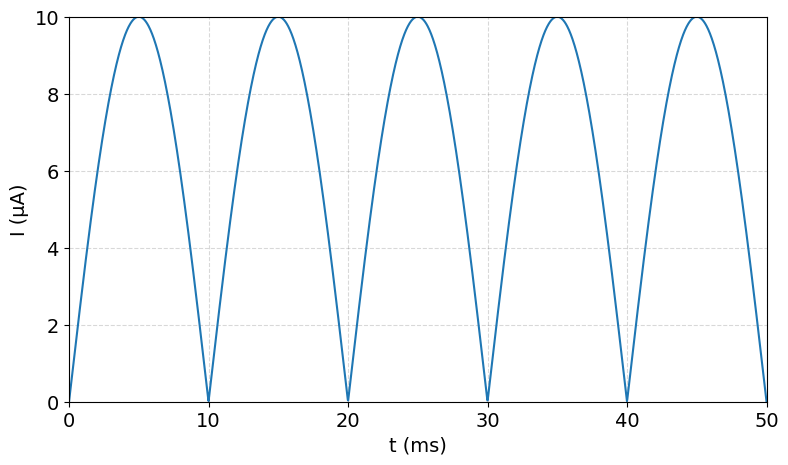

In [20]:

# 设置总的模拟时间和时间步长，注意这里时间单位应该是秒，所以乘以1e-3转换毫秒到秒
t = np.linspace(0, 50, 2000) * 1e-3  # 从0到50毫秒，2000个点  单位是s

# 创建整流正弦波电流输入，振幅为10μA
I_input_10 = 10 * np.abs(np.sin(2 * np.pi * 50 * t))

# 绘制10μA整流正弦波电流输入
plt.figure(figsize=(9, 5)) 
plt.plot(t * 1e3, I_input_10)  # 转换时间回到毫秒单位进行绘图
plt.xlabel('t (ms)')  # x轴标签是“时间(毫秒)”
plt.ylabel('I (μA)')  # y轴标签是“电流(微安培)”
plt.xlim([0, max(t) * 1e3])  # 设置x轴界限从0开始
plt.ylim([0, 10])  # 设置y轴界限从0开始
# plt.xticks(np.arange(0, 51, 10)) # plt 刻度设为一
# plt.yticks(np.arange(0, 11, 2)) # plt 刻度设为一
# plt.legend()  # 显示图例
# plt.grid(True)  # 显示网格
# plt.tight_layout() #自适应
plt.grid(True, linestyle='--', color='grey', alpha=0.3)
plt.rcParams.update({'font.size': 14}) 
plt.show()  # 显示图形


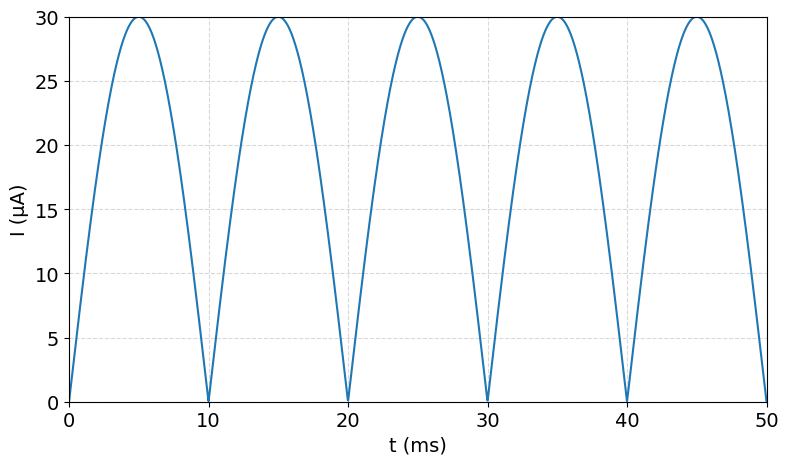

In [16]:
t2 = np.linspace(0, 50, 2000) * 1e-3 
I_input_10 = 30 * np.abs(np.sin(2 * np.pi * 50 * t))
plt.figure(figsize=(9, 5)) 
plt.plot(t * 1e3, I_input_10)  # 转换时间回到毫秒单位进行绘图
plt.xlabel('t (ms)')  # x轴标签是“时间(毫秒)”
plt.ylabel('I (μA)')  # y轴标签是“电流(微安培)”
plt.xlim([0, max(t) * 1e3])  # 设置x轴界限从0开始
plt.ylim([0, 30])  # 设置y轴界限从0开始
plt.grid(True, linestyle='--', color='grey', alpha=0.3)
plt.rcParams.update({'font.size': 14}) 
plt.show()  # 显示图形

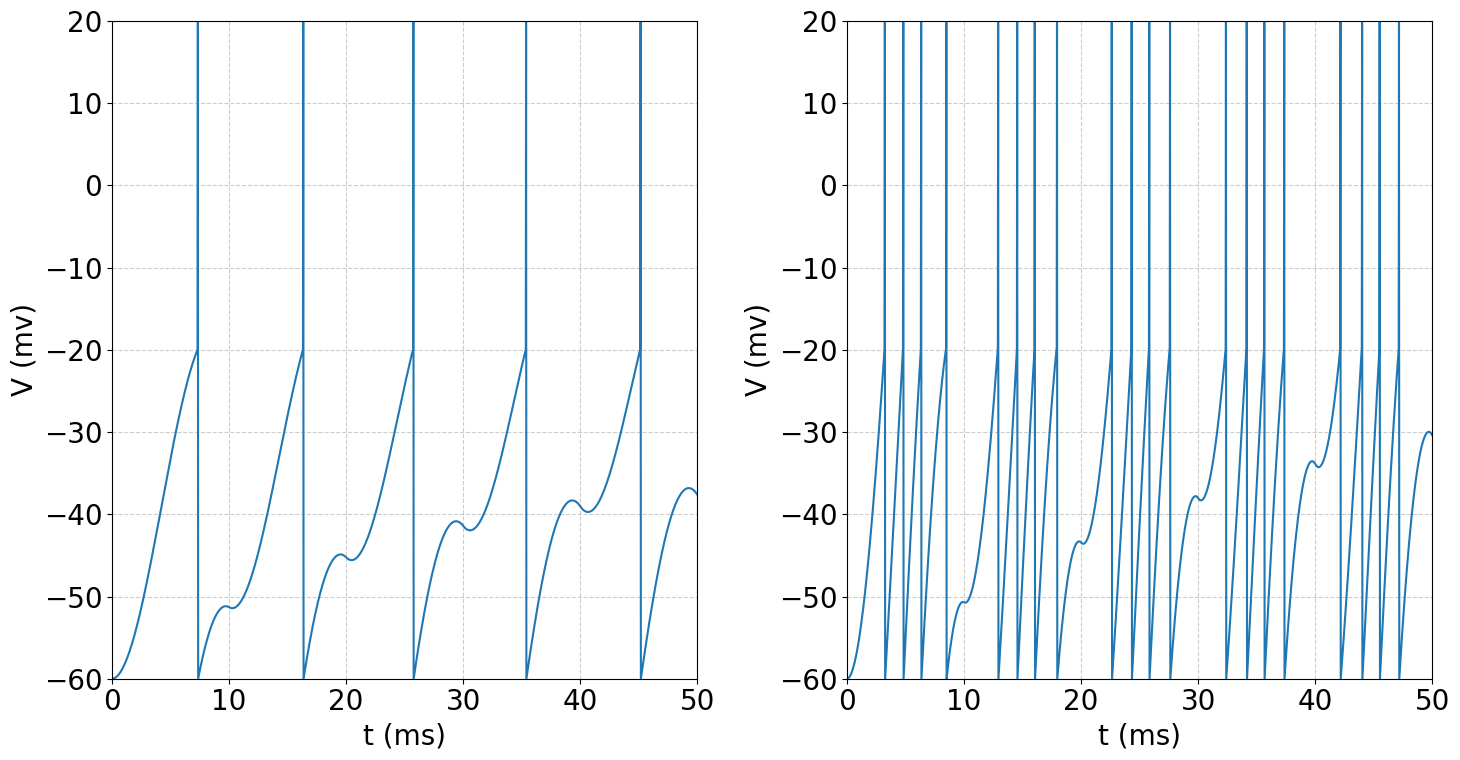

In [26]:
# Constants for the LIF model
Cm = 1e-6  # membrane capacitance (in farads)
gleak = 100e-6  # membrane leak conductivity (in siemens)
Vrest = -60e-3  # membrane resting voltage (in volts)
Vthr = -20e-3  # membrane spiking threshold voltage (in volts)
Vspike = 20e-3  # spike voltage (in volts)
Delta_t = 25e-6  # time step (in seconds)

# Time vector
T = 50e-3  # total time to simulate (in seconds)
time = np.arange(0, T, Delta_t)  # time vector

# Input currents - rectified 50 Hz sine wave with different amplitudes
I_input1 = 10e-6 * np.abs(np.sin(2 * np.pi * 50 * time))  # 10 microamperes
I_input2 = 30e-6 * np.abs(np.sin(2 * np.pi * 50 * time))  # 30 microamperes

# LIF model simulation function
def LIF(V, I, time, Delta_t, Cm, gleak, Vrest, Vthr, Vspike):
    V_output = np.zeros_like(time)
    V_output[0] = V
    for i in range(1, len(time)):
        if V_output[i-1] < Vthr:
            dV = Delta_t/Cm * (gleak * (Vrest - V_output[i-1]) + I[i-1])
            V_output[i] = V_output[i-1] + dV
        elif Vthr <= V_output[i-1] < Vspike:
            V_output[i] = Vspike
        if V_output[i-1] >= Vspike:
            V_output[i] = Vrest
    return V_output

# Simulate the neuron dynamics for both input currents
V1 = LIF(Vrest, I_input1, time, Delta_t, Cm, gleak, Vrest, Vthr, Vspike)
V2 = LIF(Vrest, I_input2, time, Delta_t, Cm, gleak, Vrest, Vthr, Vspike)

# Plot the results
plt.figure(figsize=(15, 8))

# Plot for input current with 10 µA amplitude
plt.subplot(1, 2, 1)
# plt.figure(figsize=(7.5, 8.5))
plt.plot(time * 1e3, V1 * 1e3)  # Convert to milliseconds and millivolts for plotting
plt.xlabel('t (ms)')
plt.ylabel('V (mv)')
plt.grid(True, linestyle='--', color='grey', alpha=0.4)
plt.xticks(np.arange(0, 51, 10))
plt.xlim(0, 50) #不然图像左右还有间隙
plt.yticks(np.arange(-60, 21, 10))
plt.ylim(-60, 20) #不然图像左右还有间隙
plt.rcParams.update({'font.size': 20}) 

# Plot for input current with 30 µA amplitude
plt.subplot(1, 2, 2)
plt.plot(time * 1e3, V2 * 1e3)  # Convert to milliseconds and millivolts for plotting
# 设置轴标签的字体
# plt.xlabel('t (ms)', fontdict={'family': 'monospace', 'size': 14})
# plt.ylabel('V (mv)', fontdict={'family': 'monospace', 'size': 14})

plt.xlabel('t (ms)')
plt.ylabel('V (mv)')
# plt.grid(True) 
plt.grid(True, linestyle='--', color='grey', alpha=0.4)
plt.xticks(np.arange(0, 51, 10))
plt.xlim(0, 50) #不然图像左右还有间隙
plt.yticks(np.arange(-60, 21, 10))
plt.ylim(-60, 20) #不然图像左右还有间隙
plt.rcParams.update({'font.size': 20}) 
plt.tight_layout()
plt.show()